In [1]:
import torch
import torch.nn as nn
import time
import numpy as np
import random
from matplotlib import pyplot as plt
from Network import Net,Training
from Experiment import Experiment


In [2]:
def set_seed(seed=None, seed_torch=True):
    if seed is None:
        seed = np.random.choice(2 ** 32)
    random.seed(seed)
    np.random.seed(seed)
    if seed_torch:
        torch.manual_seed(seed)

    print(f'Random seed {seed} has been set.')

In [3]:
SEED = 2021
set_seed(seed=SEED)
DEVICE = torch.device("cpu")
G_SEED = torch.Generator()
G_SEED.manual_seed(SEED)

Random seed 2021 has been set.


Constant Initialization

In [4]:
EPOCH = 20
WIDTH = 200
LR = 0.0001
REPETITION = 2

Generate Dataset Experiment

In [5]:
set_seed(seed=SEED)

experiment = Experiment(width = WIDTH,batch_size=16)
dataset = experiment.Generate_data()

Random seed 2021 has been set.


Mono Task Weather

In [10]:
train_loader, val_loader = experiment.Create_dataset(multi_task = False,space= False,weather= True)

In [12]:
LOSSES_LR = [[]for i in range(REPETITION)]
LOSSES_LR_val = [[]for i in range(REPETITION)]


for rep in range(REPETITION):
    print(f'Repetition {rep}')
    print('--------------------------------')
       
    model = Net(input_dimension=5, multi_task = False)    
    optimizer = torch.optim.Adam(model.parameters(), LR)
    criterion = nn.BCELoss()
    train = Training(model,optimizer,criterion)

    losses = []
    val_losses = []

    for epoch in range(EPOCH):

        loss = 0
        val_loss = 0 

        for x_batch, y_batch in train_loader:
            pumpkin_seed = x_batch[0][4]
            loss += train.train_network(x_batch, y_batch,pumpkin_seed, False ).detach().numpy()
        losses.append(loss/len(train_loader))
            
        with torch.no_grad():
            for x_val, y_val in val_loader:
                model.eval() # not useful for now
                yhat = model(x_val).squeeze(1)
                val_loss += criterion(yhat,y_val)
            val_losses.append(val_loss.item()/len(val_loader))


        if np.mod(epoch,20)==0: print("Epoch {}, val_loss {}".format(epoch, val_loss.item()/len(val_loader))) 

    LOSSES_LR[rep] = losses
    LOSSES_LR_val[rep] = val_losses
    print(val_losses[-1])

Repetition 0
--------------------------------
Epoch 0, val_loss 0.66008623046875
0.58373359375
Repetition 1
--------------------------------
Epoch 0, val_loss 0.7066279296875
0.62013447265625


<ipython-input-13-b4df30bf9b53>:3: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  liste_label = [np.str(i) for i in range(REPETITION)]


Text(0.5, 1.0, 'WEATHER Task')

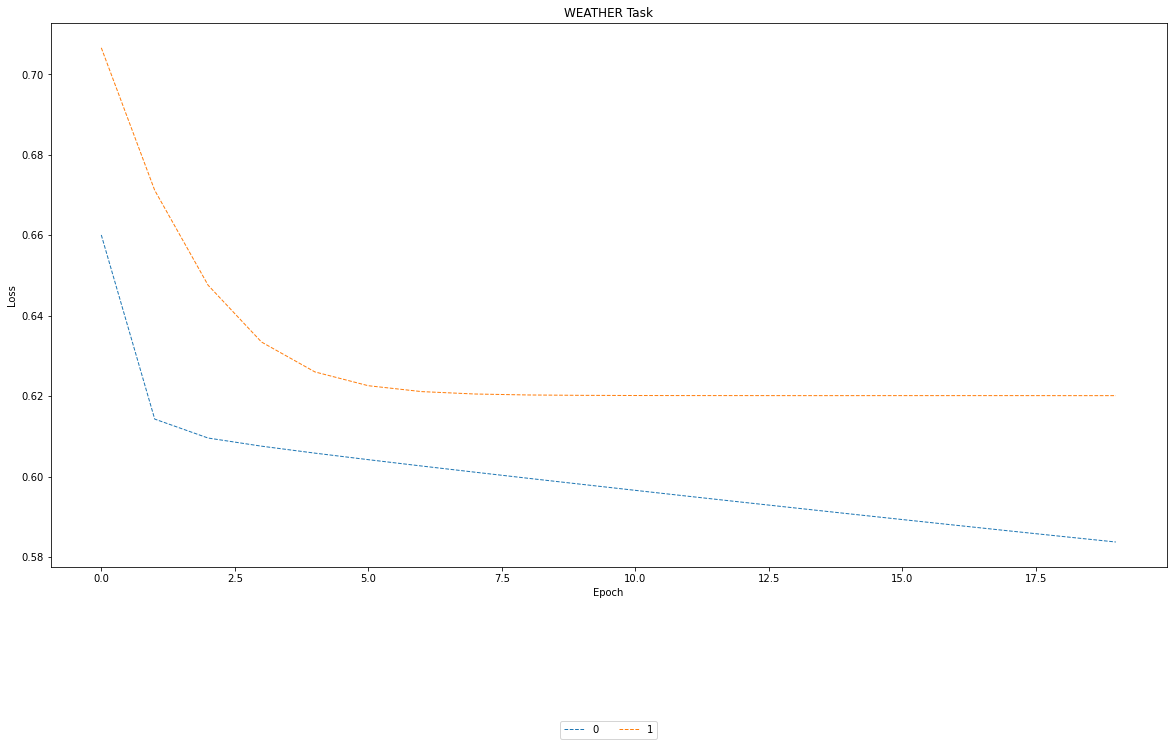

In [13]:
l_epoch = [i for i in range(len(losses))]
l_epoch_val = [i for i in range(len(val_losses))]
liste_label = [np.str(i) for i in range(REPETITION)]

plt.figure(figsize=(20, 10))
for i in range(REPETITION):
    plt.plot(l_epoch_val,LOSSES_LR_val[i], '--', linewidth=1,label = liste_label[i])
    
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.30), shadow=False, ncol=REPETITION)
plt.title("WEATHER Task")

Mono Task Space

In [ ]:
train_loader, val_loader = experiment.Create_dataset(multi_task = False,space= True,weather= False)

Multi Task

In [8]:
train_loader, val_loader = experiment.Create_dataset(multi_task = True,space= False ,weather= False)

In [9]:
LOSSES_LR = [[]for i in range(REPETITION)]
LOSSES_LR_val = [[]for i in range(REPETITION)]


for rep in range(REPETITION):
    print(f'Repetition {rep}')
    print('--------------------------------')
       
    model = Net(input_dimension=5, multi_task = True)    
    optimizer = torch.optim.Adam(model.parameters(), LR)
    criterion = nn.BCELoss()
    train = Training(model,optimizer,criterion)

    losses = []
    val_losses = []

    for epoch in range(EPOCH):

        loss = 0
        val_loss = 0 

        for x_batch, y_batch in train_loader:
            pumpkin_seed = x_batch[0][4]
            loss += train.train_network(x_batch, y_batch,pumpkin_seed, True ).detach().numpy()
        losses.append(loss/len(train_loader))
            
        with torch.no_grad():
            for x_val, y_val in val_loader:
                model.eval() # not useful for now
                yhat = model(x_val)
                val_loss += criterion(yhat,y_val)
            val_losses.append(val_loss.item()/len(val_loader))


        if np.mod(epoch,20)==0: print("Epoch {}, val_loss {}".format(epoch, val_loss.item()/len(val_loader))) 

    LOSSES_LR[rep] = losses
    LOSSES_LR_val[rep] = val_losses
    print(val_losses[-1])

Repetition 0
--------------------------------
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16, 2])
torch.Size([16

KeyboardInterrupt: 

In [ ]:
l_epoch = [i for i in range(len(losses))]
l_epoch_val = [i for i in range(len(val_losses))]
liste_label = [np.str(i) for i in range(REPETITION)]

plt.figure(figsize=(20, 10))
for i in range(REPETITION):
    plt.plot(l_epoch_val,LOSSES_LR_val[i], '--', linewidth=1,label = liste_label[i])
    
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.30), shadow=False, ncol=REPETITION)
plt.title("WEATHER Task")